In [6]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig", dpi=100)

SSRO calibration :  20161006/090917
max. F = (96.45 +/- 0.37)% at t=8 us
	ms_0 = (95.18 +/- 0.30)%
	ms_1 = (97.72 +/- 0.21)%


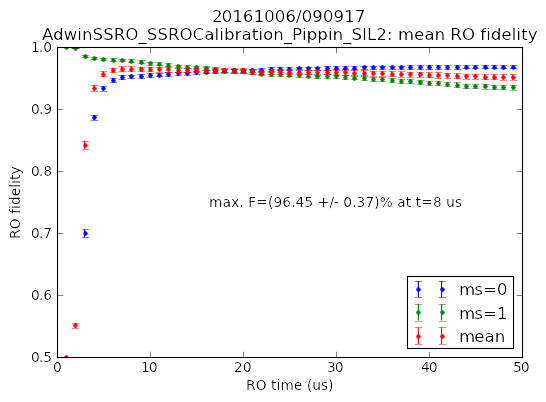

In [14]:
reload(ssro)
ssro.ssrocalib(plot_photon_ms0=False) 
#,folder = 'D:\measuring\data\20160126\180407_AdwinSSRO_SSROCalibration_Pippin_SIL1')
# print 'Threshold is 96.6'

ms0 0
msp1 1
msm1 -1
SSRO calibration :  20161006/094457
max. Fm = (93.93 +/- 0.48)% at t=5 us
	ms_0 = (92.28 +/- 0.38)%
	ms_1 = (95.58 +/- 0.29)%
max. Fp = (97.18 +/- 0.33)% at t=21 us
	ms_0 = (95.14 +/- 0.30)%
	ms_1 = (99.22 +/- 0.12)%
Job's done!


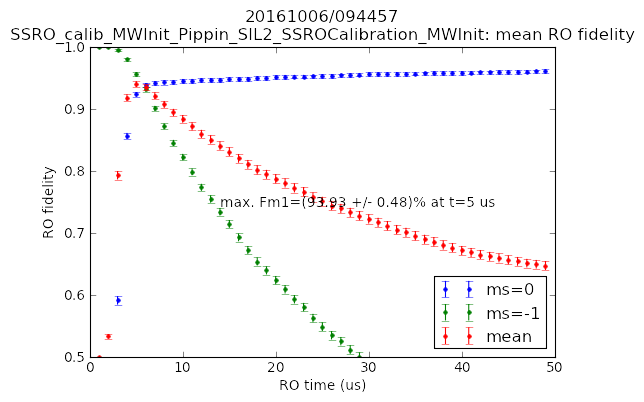

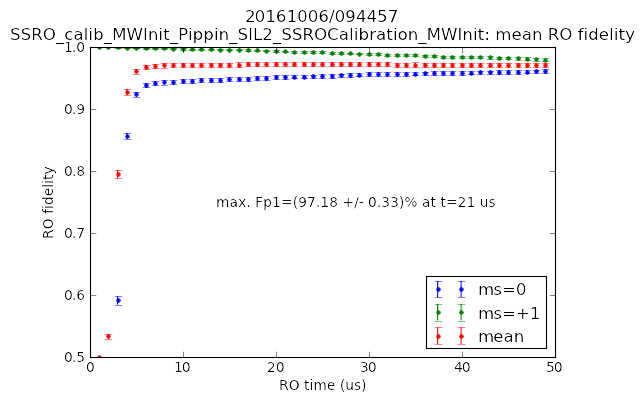

In [19]:
reload(ssro)
ssro.ssrocalib_MWInit(plot_photon_ms0=False)

# DARKESR

d:\measuring\data\20160728\115410_PulsarDarkESR_Pippin_SIL2
d:\measuring\data\20160728\115735_SSRO_calib_MWInit_Pippin_SIL2_SSROCalibration_MWInit
Converged with chi squared  0.194504200225
degrees of freedom, dof  146
RMS of residuals (i.e. sqrt(chisq/dof))  0.0364995965661
Reduced chisq (i.e. variance of residuals)  0.00133222054949

fitted parameters at minimum, with 68% C.I.:
 0 a              1.007849 +/-   0.005619
 1 A             -0.061994 +/-   0.009450
 2 sigma          0.000602 +/-   0.000104
 3 x0             4.048784 +/-   0.000080
 4 s1             0.002252 +/-   0.000067

correlation matrix:
               a         A         sigma     x0        s1        
         a  1.000000
         A -0.186202  1.000000
     sigma  0.430428  0.729685  1.000000
        x0  0.063075 -0.546116 -0.430374  1.000000
        s1  0.211390  0.081713  0.246741  0.043306  1.000000



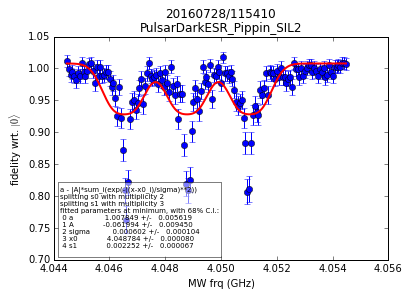

In [8]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis_purification.py')

# Pi pulses

d:\measuring\data\20161006\091411_Pi_Calibration_Pippin_SIL2Pi
[ 0.1295  0.1005  0.0975  0.0905  0.096   0.1195  0.1515  0.174   0.215
  0.2545  0.285   0.3255]
min x =  0.680818181818
min y = 0.0687162891046
[ 0.1295  0.1005  0.0975  0.0905  0.096   0.1195  0.1515  0.174   0.215
  0.2545  0.285   0.3255]
min x =  0.680818181818
min y = 0.0687162891046
fitted infidelity 0.0786758827016
Fitted minimum at  0.675373231758


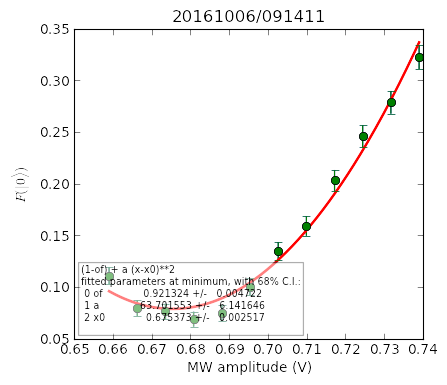

In [17]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Calibration')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.68,a_guess=0,of_guess=0, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
#ax.set_ylim(0,1.)
print 'fitted infidelity', 1-fit['params'][0]
print 'Fitted minimum at ', fit['params'][2]

# Pi/2

[ 0.366  0.39   0.414  0.438  0.462  0.486  0.51   0.534  0.558  0.582
  0.606]
Converged with chi squared  0.00826014462235
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0302951125914
Reduced chisq (i.e. variance of residuals)  0.000917793846928

fitted parameters at minimum, with 68% C.I.:
 0 m             -2.803112 +/-   0.120355
 1 x0             0.466198 +/-   0.003368

correlation matrix:
               m         x0        
         m  1.000000
        x0 -0.252459  1.000000



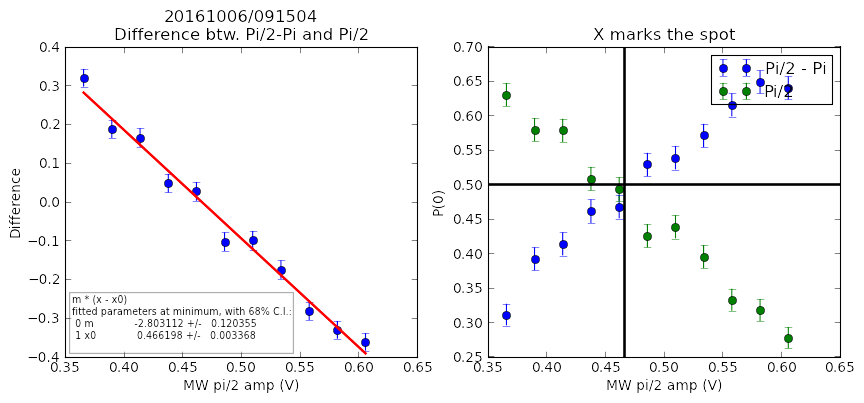

In [18]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

#Electron T1

Converged with chi squared  0.0330628118189
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.0524903259491
Reduced chisq (i.e. variance of residuals)  0.00275523431824

fitted parameters at minimum, with 68% C.I.:
 0 A              0.691973 +/-   0.033195
 1 tau        85393.530334 +/- 8757.741656

correlation matrix:
               A         tau       
         A  1.000000
       tau -0.742325  1.000000

minimal point: 84630.7692308


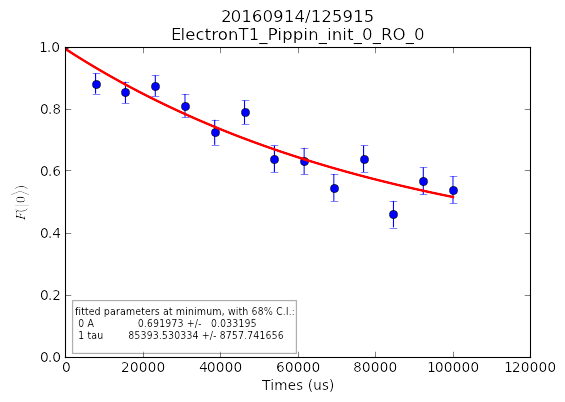

In [9]:
### no RO correction
from analysis.lib.fitting import fit
folder= tb.latest_data('ElectronT1')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0,1.0)
y = a.p0
p0,fitfunc,fitfunc_str = common.fit_exp_decay_with_offset(0.3,0.7,50e3)
fit_result = fit.fit1d(a.sweep_pts,y,None,p0=p0,fitfunc=fitfunc,do_print=True,fixed=[0],ret=True)
plot.plot_fit1d(fit_result,np.linspace(a.sweep_pts[0],a.sweep_pts[-1],100),ax=ax,plot_data=False)
print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

# PM Sweep

[ 0.928  0.927  0.908  0.901  0.917  0.916  0.752  0.495  0.365  0.139
  0.089  0.077  0.058  0.059  0.059  0.07   0.056  0.064  0.064  0.054]
min x =  40.0
min y = 0.0421007867319


(0, 1.0)

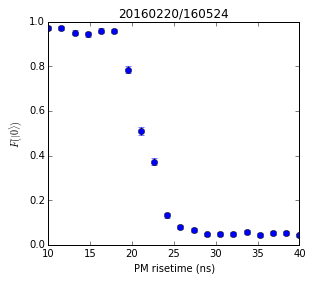

In [9]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('PMrisetime')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
#fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(0,1.)

# Theta pulse

d:\measuring\data\20160824\130325_Pi_Calibration_Pippin_SIL2theta
[ 0.3792  0.3798  0.367   0.3578  0.3428  0.3368  0.3224  0.316   0.2964
  0.312   0.2992  0.2778]
min x =  0.635
min y = 0.291577597264


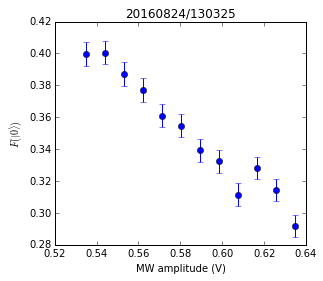

In [3]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('theta')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#ax.set_ylim(0.2,0.35)